<a href="https://colab.research.google.com/github/saivardhanvemula/DLASSIGNMENT-1/blob/main/DlAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


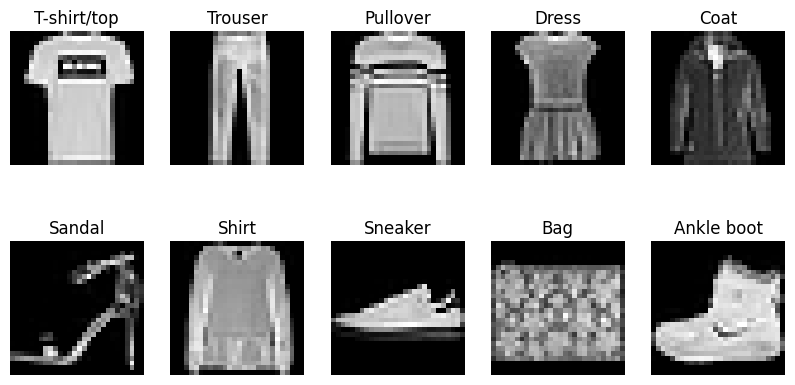

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot sample images from each class
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    # Get the first image from each class
    image = train_images[train_labels == i][0]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape, num_classes, hidden_layers, neurons_per_layer, activation='relu'):
    model = models.Sequential()

    # Input layer
    model.add(layers.Flatten(input_shape=input_shape))

    # Hidden layers
    for _ in range(hidden_layers):
        model.add(layers.Dense(neurons_per_layer, activation=activation))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [ ]:
def compile_model(model, optimizer='adam', learning_rate=1e-3):
    if optimizer == 'sgd':
        optimizer_instance = tf.keras.optimizers.SGD(learning_rate)
    elif optimizer == 'momentum':
        optimizer_instance = tf.keras.optimizers.SGD(learning_rate, momentum=0.9)
    elif optimizer == 'nesterov':
        optimizer_instance = tf.keras.optimizers.SGD(learning_rate, momentum=0.9, nesterov=True)
    elif optimizer == 'rmsprop':
        optimizer_instance = tf.keras.optimizers.RMSprop(learning_rate)
    elif optimizer == 'adam':
        optimizer_instance = tf.keras.optimizers.Adam(learning_rate)
    elif optimizer == 'nadam':
        optimizer_instance = tf.keras.optimizers.Nadam(learning_rate)

    model.compile(optimizer=optimizer_instance, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.model_selection import train_test_split

# Normalize images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Split off a validation set (10% of training data)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7513 - loss: 0.7083 - val_accuracy: 0.8397 - val_loss: 0.4437
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8583 - loss: 0.3874 - val_accuracy: 0.8415 - val_loss: 0.4027
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8701 - loss: 0.3535 - val_accuracy: 0.8662 - val_loss: 0.3640
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8771 - loss: 0.3318 - val_accuracy: 0.8757 - val_loss: 0.3433
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8863 - loss: 0.3099 - val_accuracy: 0.8720 - val_loss: 0.3588
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8889 - loss: 0.3003 - val_accuracy: 0.8823 - val_loss: 0.3343
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8960 - loss: 0.2837 - val_accuracy: 0.8820 - val_loss: 0.3363
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8988 - loss: 0.270

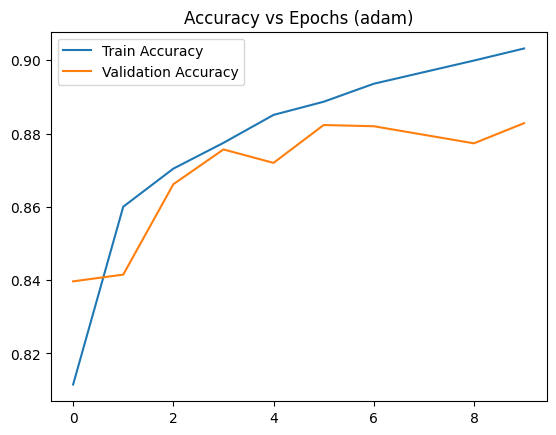

In [ ]:
# Example configuration
epochs = 10
hidden_layers = 4
neurons_per_layer = 64
activation = 'relu'
batch_size = 32
optimizer = 'adam'
learning_rate = 1e-3

# Build and compile model
model = build_model((28, 28), 10, hidden_layers, neurons_per_layer, activation)
model = compile_model(model, optimizer, learning_rate)

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title(f"Accuracy vs Epochs ({optimizer})")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7426 - loss: 0.7197 - val_accuracy: 0.8557 - val_loss: 0.3967
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8587 - loss: 0.3905 - val_accuracy: 0.8708 - val_loss: 0.3755
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8685 - loss: 0.3541 - val_accuracy: 0.8487 - val_loss: 0.4213
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8783 - loss: 0.3303 - val_accuracy: 0.8783 - val_loss: 0.3443
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8870 - loss: 0.3072 - val_accuracy: 0.8757 - val_loss: 0.3411
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8900 - loss: 0.2940 - val_accuracy: 0.8733 - val_loss: 0.3474
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8940 - loss: 0.2822 - val_accuracy: 0.8735 - val_loss: 0.3525
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8970 - loss: 0.274

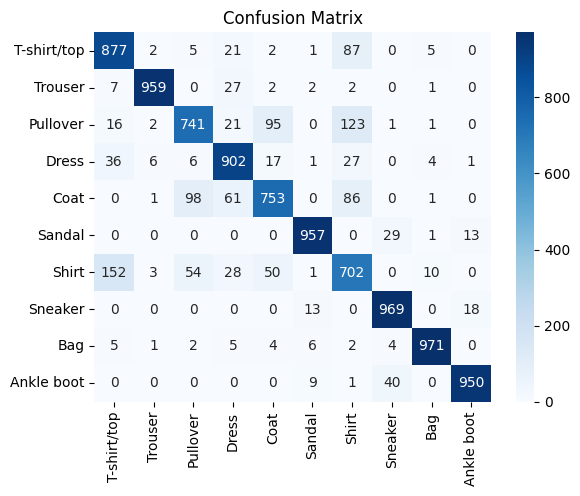

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the best model configuration
best_model = build_model((28, 28), 10, 4, 64, 'relu')
best_model = compile_model(best_model, 'adam', 1e-3)
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Make predictions and plot confusion matrix
predictions = best_model.predict(test_images)
y_pred = predictions.argmax(axis=1)

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Compute loss for cross-entropy and squared error
from sklearn.metrics import mean_squared_error

# Predictions (probabilities from softmax)
predictions = best_model.predict(test_images)

# Cross-entropy loss is already part of the model's training
cross_entropy_loss = test_loss

# Squared Error Loss (for comparison)
squared_error_loss = mean_squared_error(test_labels, predictions.argmax(axis=1))
print(f"Squared Error Loss: {squared_error_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Squared Error Loss: 1.6426
